In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor,BaggingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from impyute.imputation.cs import mice,fast_knn
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.feature_selection import SelectKBest,f_regression,f_classif,chi2
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import model_selection

In [3]:
train= pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Hackathon\\train-new.csv')

In [4]:
test= pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Hackathon\\test-new.csv')

In [5]:
train.head(15)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0
5,10-24,720.453,alive,airbag,belted,1,m,47,1998,1997,nodeploy,driver,0,11:32:1,0
6,10-24,1.000,alive,airbag,belted,1,m,17,2002,1991,deploy,driver,1,50:3:1,2
7,40-54,20.862,alive,none,none,1,m,39,2001,1994,unavail,driver,0,73:95:1,3
8,10-24,115.576,alive,none,belted,1,f,74,2002,1987,unavail,driver,0,78:107:1,3
9,25-39,33.640,alive,none,belted,1,f,31,1999,1991,unavail,pass,0,3:108:2,1


In [6]:
df=train.copy()

In [9]:
df.caseid.value_counts()

45:175:1    8
12:19:1     8
45:79:1     8
12:54:2     7
12:3:1      7
           ..
12:113:3    1
4:125:2     1
79:178:2    1
6:50:1      1
79:100:2    1
Name: caseid, Length: 8236, dtype: int64

In [26]:
test.isnull().sum()

dvcat       0
weight      0
dead        0
airbag      0
seatbelt    0
frontal     0
sex         0
ageOFocc    0
yearacc     0
yearVeh     0
abcat       0
occRole     0
deploy      0
caseid      0
dtype: int64

In [23]:
locs = test[test.yearVeh.isnull()].index

In [25]:
for i in locs:
    b=pd.DataFrame(stats.mode(test.yearVeh))
    test.iloc[i, 9] = b.iloc[0,0]
    print(i)

1671


In [8]:
numeric=[]
categorial=[]

def seperate(data):
    type=['int32','int64','float32','float64']
    for i in data.columns:
        if data[i].dtype in type:
            numeric.append(i)
        else:
            categorial.append(i)

In [9]:
seperate(train)

# Univariate Analysis

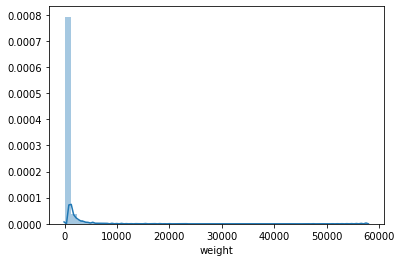

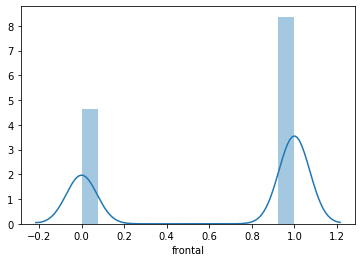

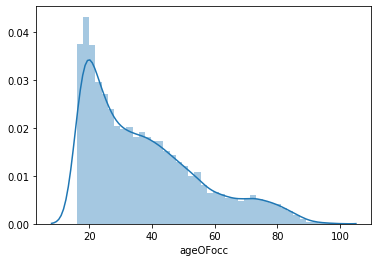

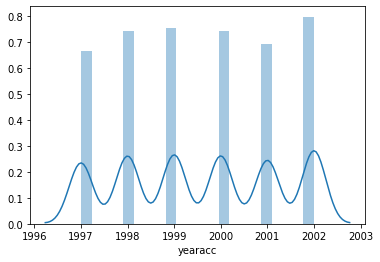

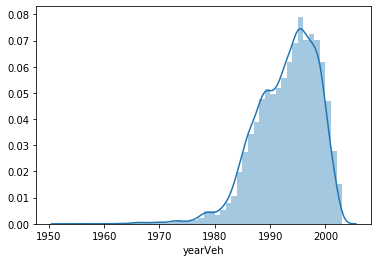

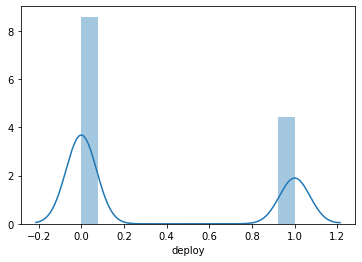

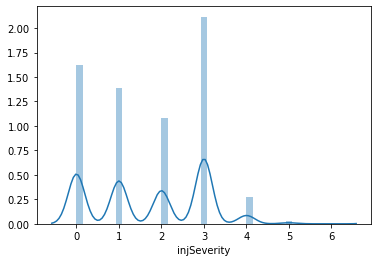

In [11]:
for i in numeric:
        sns.distplot(train[i])
        plt.show()

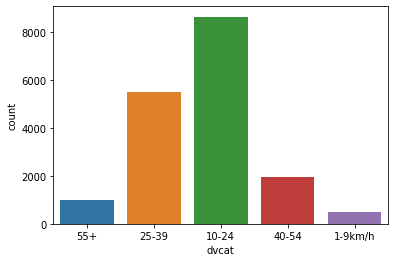

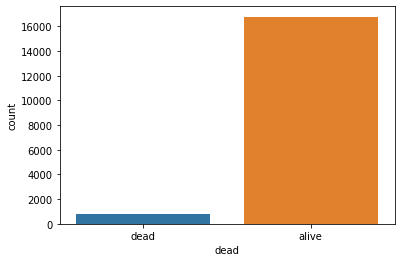

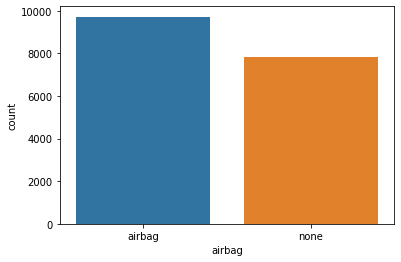

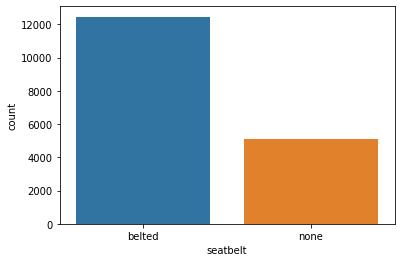

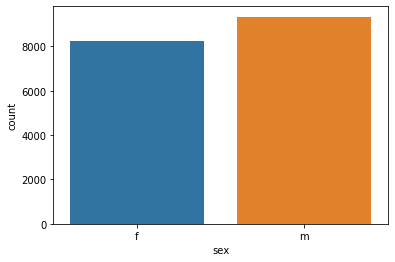

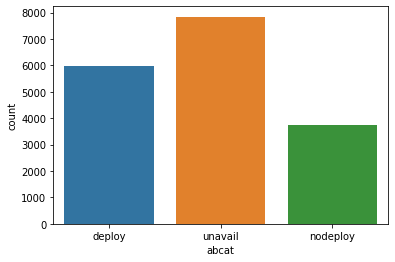

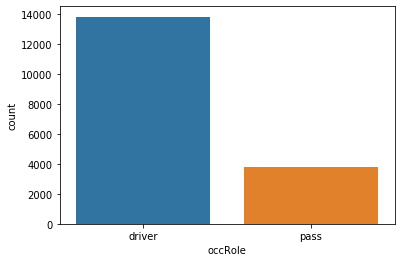

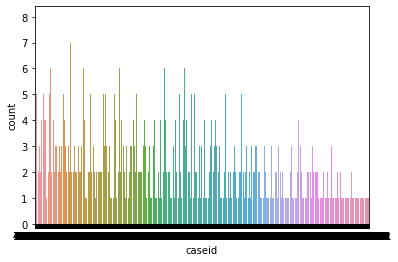

In [12]:
for i in categorial:
        sns.countplot(train[i])
        plt.show()

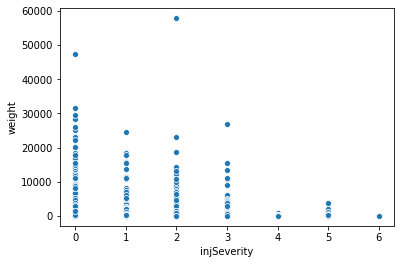

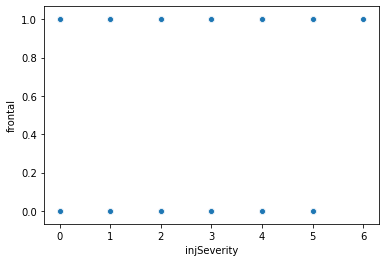

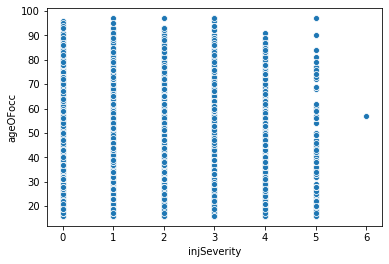

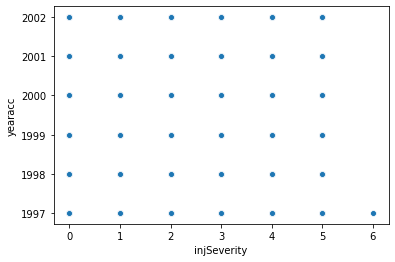

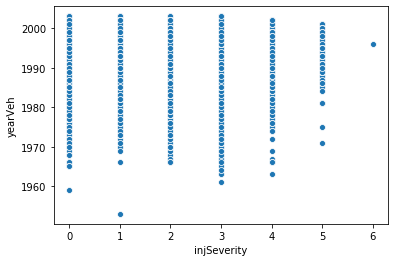

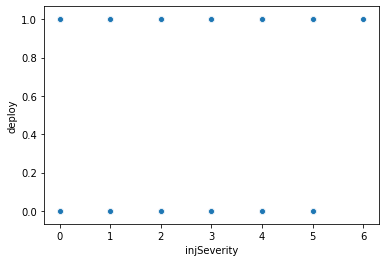

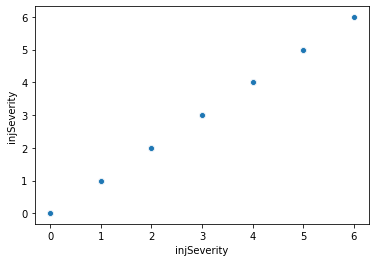

In [18]:
for i in numeric:
        sns.scatterplot(train['injSeverity'],train[i])
        plt.show()

In [27]:
train.corr()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
weight,1.000000,-0.011311,-0.026542,0.008976,-0.009341,-0.055878,-0.207602
frontal,-0.011311,1.000000,-0.048092,0.017309,-0.022682,0.237448,-0.019992
ageOFocc,-0.026542,-0.048092,1.000000,-0.006382,0.019544,0.010647,0.086280
yearacc,0.008976,0.017309,-0.006382,1.000000,0.297359,0.121288,-0.038700
yearVeh,-0.009341,-0.022682,0.019544,0.297359,1.000000,0.483176,-0.075241
deploy,-0.055878,0.237448,0.010647,0.121288,0.483176,1.000000,0.062800
injSeverity,-0.207602,-0.019992,0.086280,-0.038700,-0.075241,0.062800,1.000000


In [30]:
train.cov()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
weight,2.164278e+06,-7.970331,-700.712296,22.476178,-76.523364,-38.946784,-394.156516
frontal,-7.970331e+00,0.229438,-0.413384,0.014112,-0.060504,0.053886,-0.012359
ageOFocc,-7.007123e+02,-0.413384,322.031342,-0.194930,1.953110,0.090517,1.998210
yearacc,2.247618e+01,0.014112,-0.194930,2.897355,2.818686,0.097813,-0.085013
yearVeh,-7.652336e+01,-0.060504,1.953110,2.818686,31.011954,1.274808,-0.540752
deploy,-3.894678e+01,0.053886,0.090517,0.097813,1.274808,0.224466,0.038399
injSeverity,-3.941565e+02,-0.012359,1.998210,-0.085013,-0.540752,0.038399,1.665557


In [28]:
train.head(15)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0
5,10-24,720.453,alive,airbag,belted,1,m,47,1998,1997,nodeploy,driver,0,11:32:1,0
6,10-24,1.000,alive,airbag,belted,1,m,17,2002,1991,deploy,driver,1,50:3:1,2
7,40-54,20.862,alive,none,none,1,m,39,2001,1994,unavail,driver,0,73:95:1,3
8,10-24,115.576,alive,none,belted,1,f,74,2002,1987,unavail,driver,0,78:107:1,3
9,25-39,33.640,alive,none,belted,1,f,31,1999,1991,unavail,pass,0,3:108:2,1


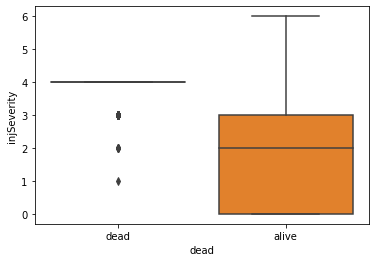

In [35]:
sns.boxplot(train.dead,train.injSeverity)
plt.show()

In [37]:
train.dead.replace({'alive':0,'dead':1},inplace=True)

In [45]:
test.dead.replace({'alive':0,'dead':1},inplace=True)

In [38]:
train.head(5)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,1,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,0,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,0,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,0,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,0,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0


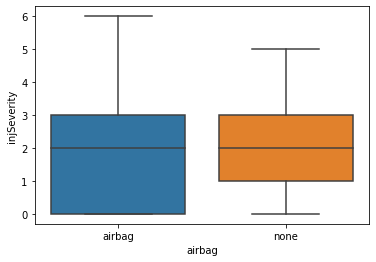

In [39]:
sns.boxplot(train.airbag,train.injSeverity)

In [40]:
pd.crosstab(train.airbag,train.injSeverity)

injSeverity,0,1,2,3,4,5,6
airbag,,,,,,,
airbag,2569,2226,1652,2907,322,47,1
none,1806,1514,1260,2811,407,43,0


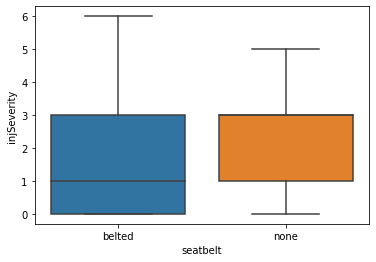

In [41]:
sns.boxplot(train.seatbelt,train.injSeverity)

In [42]:
pd.crosstab(train.seatbelt,train.injSeverity)

injSeverity,0,1,2,3,4,5,6
seatbelt,,,,,,,
belted,3731,2949,1999,3412,307,60,1
none,644,791,913,2306,422,30,0


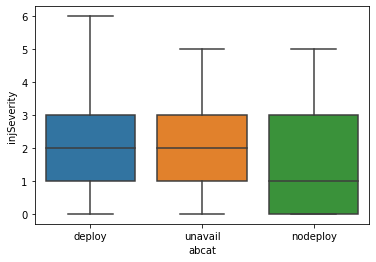

In [43]:
sns.boxplot(train.abcat,train.injSeverity)

In [44]:
pd.crosstab(train.abcat,train.injSeverity)

injSeverity,0,1,2,3,4,5,6
abcat,,,,,,,
deploy,1154,1319,1212,2024,236,29,1
nodeploy,1415,907,440,883,86,18,0
unavail,1806,1514,1260,2811,407,43,0


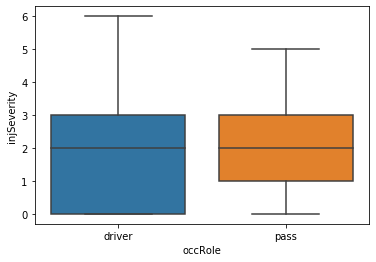

In [46]:
sns.boxplot(train.occRole,train.injSeverity)

In [47]:
pd.crosstab(train.occRole,train.injSeverity)

injSeverity,0,1,2,3,4,5,6
occRole,,,,,,,
driver,3476,2883,2249,4563,562,68,1
pass,899,857,663,1155,167,22,0


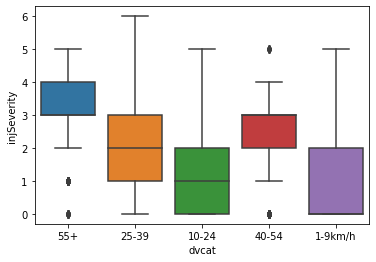

In [48]:
sns.boxplot(train.dvcat,train.injSeverity)

In [49]:
pd.crosstab(train.dvcat,train.injSeverity)

injSeverity,0,1,2,3,4,5,6
dvcat,,,,,,,
1-9km/h,249,103,52,62,2,4,0
10-24,3073,2244,1278,1924,76,50,0
25-39,912,1106,1092,2191,163,24,1
40-54,125,235,380,1004,215,9,0
55+,16,52,110,537,273,3,0


# feature Engineering

In [50]:
train['car_age']=train.yearacc-train.yearVeh

In [51]:
train.head(10)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,car_age
0,55+,53.342,1,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3,5
1,25-39,154.960,0,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3,33
2,55+,38.994,0,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3,8
3,25-39,168.568,0,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3,2
4,10-24,27.751,0,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0,5
5,10-24,720.453,0,airbag,belted,1,m,47,1998,1997,nodeploy,driver,0,11:32:1,0,1
6,10-24,1.000,0,airbag,belted,1,m,17,2002,1991,deploy,driver,1,50:3:1,2,11
7,40-54,20.862,0,none,none,1,m,39,2001,1994,unavail,driver,0,73:95:1,3,7
8,10-24,115.576,0,none,belted,1,f,74,2002,1987,unavail,driver,0,78:107:1,3,15
9,25-39,33.640,0,none,belted,1,f,31,1999,1991,unavail,pass,0,3:108:2,1,8


In [56]:
test['car_age']=test.yearacc-test.yearVeh

In [57]:
test.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,car_age
0,40-54,18.895,0,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1,2.0
1,25-39,266.532,0,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2,10.0
2,25-39,51.810,0,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2,5.0
3,10-24,1567.626,0,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1,8.0
4,25-39,31.342,0,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2,7.0


In [59]:
new_train=train.drop(['caseid','yearacc','yearVeh'],axis=1)

In [60]:
new_test=test.drop(['caseid','yearacc','yearVeh'],axis=1)

In [61]:
new_train.head(15)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,abcat,occRole,deploy,injSeverity,car_age
0,55+,53.342,1,airbag,belted,1,f,48,deploy,driver,1,3,5
1,25-39,154.960,0,none,none,1,m,26,unavail,driver,0,3,33
2,55+,38.994,0,none,none,1,f,51,unavail,driver,0,3,8
3,25-39,168.568,0,airbag,belted,1,m,27,deploy,pass,1,3,2
4,10-24,27.751,0,airbag,belted,0,m,26,nodeploy,pass,0,0,5
5,10-24,720.453,0,airbag,belted,1,m,47,nodeploy,driver,0,0,1
6,10-24,1.000,0,airbag,belted,1,m,17,deploy,driver,1,2,11
7,40-54,20.862,0,none,none,1,m,39,unavail,driver,0,3,7
8,10-24,115.576,0,none,belted,1,f,74,unavail,driver,0,3,15
9,25-39,33.640,0,none,belted,1,f,31,unavail,pass,0,1,8


In [62]:
dummy_train=pd.get_dummies(new_train)
dummy_test=pd.get_dummies(new_test)

In [63]:
dummy_train.shape

(17565, 23)

In [64]:
dummy_test.shape

(8652, 22)

In [66]:
X=dummy_train.drop(['injSeverity'],axis=1)
Y=dummy_train.injSeverity

In [67]:
# Final Submission
dt=DecisionTreeClassifier()
# Fit and Predict
dt.fit(X,Y)
pred_dt = dt.predict(dummy_test)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_dt 
                       })

# Export it in csv
solution.to_csv("DT.csv", index = False)

In [68]:
dt.

array([0.39205465, 0.05959613, 0.02567331, 0.2095328 , 0.00634646,
       0.16246943, 0.00493289, 0.0159573 , 0.00736411, 0.00559769,
       0.00331015, 0.00554653, 0.0066817 , 0.00584083, 0.00964833,
       0.01025322, 0.00707203, 0.0088631 , 0.0097196 , 0.00632612,
       0.01736098, 0.01985262])

In [69]:
X.columns

Index(['weight', 'dead', 'frontal', 'ageOFocc', 'deploy', 'car_age',
       'dvcat_1-9km/h', 'dvcat_10-24', 'dvcat_25-39', 'dvcat_40-54',
       'dvcat_55+', 'airbag_airbag', 'airbag_none', 'seatbelt_belted',
       'seatbelt_none', 'sex_f', 'sex_m', 'abcat_deploy', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_driver', 'occRole_pass'],
      dtype='object')

In [76]:
# Final Submission
br=BaggingClassifier()
# Fit and Predict
br.fit(X,Y)
pred_br = br.predict(dummy_test)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_br })

# Export it in csv
solution.to_csv("BR2.csv", index = False)

In [78]:
gb=GradientBoostingClassifier()
# Fit and Predict
gb.fit(X,Y)
pred_gb = gb.predict(dummy_test)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_gb })

# Export it in csv
solution.to_csv("GB.csv", index = False)

In [84]:
cl=X.columns

In [85]:
fi=gb.feature_importances_

In [86]:
m=pd.DataFrame()

In [87]:
m['feature']=cl
m['score']=fi

In [91]:
n=m.sort_values(ascending=False,by='feature')

In [92]:
n

,feature,score
0,weight,0.380206
16,sex_m,0.013988
15,sex_f,0.016207
14,seatbelt_none,0.023225
13,seatbelt_belted,0.025638
21,occRole_pass,0.003233
20,occRole_driver,0.002502
2,frontal,0.013757
10,dvcat_55+,0.012363
9,dvcat_40-54,0.007417


In [95]:
n.feature

0              weight
16              sex_m
15              sex_f
14      seatbelt_none
13    seatbelt_belted
21       occRole_pass
20     occRole_driver
2             frontal
10          dvcat_55+
9         dvcat_40-54
8         dvcat_25-39
7         dvcat_10-24
6       dvcat_1-9km/h
4              deploy
1                dead
5             car_age
12        airbag_none
11      airbag_airbag
3            ageOFocc
19      abcat_unavail
18     abcat_nodeploy
17       abcat_deploy
Name: feature, dtype: object

In [101]:
 new_X=X[['weight',
             'sex_m',
              'sex_f',
      'seatbelt_none',
    'seatbelt_belted',
       'occRole_pass',
     'occRole_driver',
             'frontal',
          'dvcat_55+',
         'dvcat_40-54',
         'dvcat_25-39',
         'dvcat_10-24',
       'dvcat_1-9km/h',
              'deploy',
                'dead',
             'car_age']]

In [102]:
new_test=dummy_test[['weight',
             'sex_m',
              'sex_f',
      'seatbelt_none',
    'seatbelt_belted',
       'occRole_pass',
     'occRole_driver',
             'frontal',
          'dvcat_55+',
         'dvcat_40-54',
         'dvcat_25-39',
         'dvcat_10-24',
       'dvcat_1-9km/h',
              'deploy',
                'dead',
             'car_age']]

In [103]:
gb=GradientBoostingClassifier()
# Fit and Predict
gb.fit(new_X,Y)
pred_gb = gb.predict(new_test)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_gb })

# Export it in csv
solution.to_csv("GB1.csv", index = False)

In [98]:
### calculating the vif values as multicollinearity exists
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)


## includes only the relevant features.
train_out.head()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Iteration no.
1
[1.0297778862498828, 1.1556348467016075, 1.1765901596331303, 1.0323129752185265, inf, 2.1409873254253142, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Max VIF is for variable no.:
4
Iteration no.
2
[1.0297778862498828, 1.1556348467016078, 1.1765901596331303, 1.0323129752185265, 2.140987325425315, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Max VIF is for variable no.:
5
Iteration no.
3
[1.0297778862498828, 1.1556348467016075, 1.1765901596331303, 1.0323129752185265, 2.1409873254253142, 9.990361590162825, 9.009494531246212, 4.8162796622015085, 3.1729888381460176, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Max VIF is for variable no.:
9
Iteration no.
4
[1.0297778862498828, 1.1556348467016075, 1.176590159633131, 1.032312975218526, 2.140987325425314, 9.990361590162825, 9.009494531246212, 4.816279662201511, 3.1729888381460176, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Max VIF is for var

,weight,dead,frontal,ageOFocc,car_age,dvcat_25-39,dvcat_40-54,dvcat_55+,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,53.342,1,1,48,5,0,0,1,0,0,0,0,0
1,154.960,0,1,26,33,1,0,0,1,1,0,1,0
2,38.994,0,1,51,8,0,0,1,1,0,0,1,0
3,168.568,0,1,27,2,1,0,0,0,1,0,0,1
4,27.751,0,0,26,5,0,0,0,0,1,1,0,1


In [99]:
train_out.columns

Index(['weight', 'dead', 'frontal', 'ageOFocc', 'car_age', 'dvcat_25-39',
       'dvcat_40-54', 'dvcat_55+', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass'],
      dtype='object')

In [104]:
test_out=dummy_test[['weight', 'dead', 'frontal', 'ageOFocc', 'car_age', 'dvcat_25-39',
       'dvcat_40-54', 'dvcat_55+', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass']]

In [116]:
gb=GradientBoostingClassifier()
# Fit and Predict
gb.fit(train_out,Y)
pred_gb = gb.predict(test_out)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_gb })

# Export it in csv
solution.to_csv("GB2.csv", index = False)

In [109]:
ad=AdaBoostClassifier()
# Fit and Predict
ad.fit(train_out,Y)
pred_ad = ad.predict(test_out)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_ad})

# Export it in csv
solution.to_csv("AD2.csv", index = False)

In [112]:
rf=RandomForestClassifier()
# Fit and Predict
rf.fit(train_out,Y)
pred_rf = rf.predict(test_out)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_rf})

# Export it in csv
solution.to_csv("RF1.csv", index = False)

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

In [174]:
gb=GradientBoostingClassifier(learning_rate=0.15,n_estimators=120,max_depth=3,min_samples_split=0.4,
                             )
# Fit and Predict
gb.fit(new_X,Y)
pred_gb = gb.predict(new_test)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_gb })

# Export it in csv
solution.to_csv("GB11.csv", index = False)

In [ ]:
10-max-depth 3

In [172]:
train_out

,weight,dead,frontal,ageOFocc,car_age,dvcat_25-39,dvcat_40-54,dvcat_55+,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,53.342,1,1,48,5,0,0,1,0,0,0,0,0
1,154.960,0,1,26,33,1,0,0,1,1,0,1,0
2,38.994,0,1,51,8,0,0,1,1,0,0,1,0
3,168.568,0,1,27,2,1,0,0,0,1,0,0,1
4,27.751,0,0,26,5,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,131.491,0,0,28,5,0,0,0,0,1,0,0,0
17561,281.693,0,1,39,11,0,0,0,0,0,0,1,0
17562,419.418,0,1,29,9,0,0,0,0,0,0,0,0
17563,9.815,0,1,22,10,0,1,0,1,0,0,1,0


In [179]:
train[train_out.weight==0]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,car_age
24,10-24,0.0,0,airbag,none,1,m,19,1999,1999,deploy,driver,1,8:801:1,1,0
46,10-24,0.0,0,airbag,none,0,f,31,1998,1998,deploy,driver,1,82:801:2,2,0
84,10-24,0.0,0,airbag,belted,1,f,64,2001,2001,deploy,pass,1,41:501:1,1,0
318,25-39,0.0,0,airbag,belted,0,m,19,2002,1999,nodeploy,driver,0,9:501:2,0,3
500,10-24,0.0,0,airbag,belted,1,m,32,1999,1999,deploy,driver,1,74:803:1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,10-24,0.0,0,airbag,belted,1,m,22,1999,1998,deploy,driver,1,11:804:3,2,1
16873,10-24,0.0,0,airbag,belted,0,m,33,1998,1998,deploy,driver,1,49:808:1,1,0
17049,10-24,0.0,0,airbag,belted,0,f,20,1998,1998,deploy,driver,1,11:803:1,1,0
17381,10-24,0.0,0,airbag,belted,1,m,39,1999,1998,deploy,driver,1,45:802:1,3,1


In [180]:
locs = train_out[train_out.weight==0].index

In [181]:
X_imp=train_out.copy()

In [185]:
X_imp

,weight,dead,frontal,ageOFocc,car_age,dvcat_25-39,dvcat_40-54,dvcat_55+,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,53.342,1,1,48,5,0,0,1,0,0,0,0,0
1,154.960,0,1,26,33,1,0,0,1,1,0,1,0
2,38.994,0,1,51,8,0,0,1,1,0,0,1,0
3,168.568,0,1,27,2,1,0,0,0,1,0,0,1
4,27.751,0,0,26,5,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,131.491,0,0,28,5,0,0,0,0,1,0,0,0
17561,281.693,0,1,39,11,0,0,0,0,0,0,1,0
17562,419.418,0,1,29,9,0,0,0,0,0,0,0,0
17563,9.815,0,1,22,10,0,1,0,1,0,0,1,0


In [187]:
X_imp.iloc[0,0]

53.3419999997132

In [188]:
for i in locs:
    X_imp.iloc[i, 0] = np.NAN
    print(i)

24
46
84
318
500
762
776
1024
1161
1208
1214
1290
1330
1416
1440
1623
1877
2099
2362
2370
2499
2810
2811
3086
3152
3187
3331
3343
3590
3759
3785
3993
4115
4282
4288
4609
4655
4690
4778
4785
4899
5228
5314
5503
5777
5825
5840
6201
6246
6348
6402
6502
6520
6635
6694
6894
7052
7149
7441
7537
7614
7863
7890
7931
8173
8491
8564
8669
8870
9018
9255
9418
9446
9647
9803
9855
9862
10078
10121
10146
10215
10218
10334
10358
10545
10562
10695
11249
11453
11532
11613
11760
11763
11936
12232
12633
12664
12725
12800
12993
13133
13203
13226
13449
13453
13457
13555
13656
13703
13728
13779
13788
14027
14130
14169
14817
14850
14908
14910
14971
15132
15188
15215
15343
15357
15456
15518
15533
15709
15726
15884
15901
16164
16165
16588
16612
16637
16657
16873
17049
17381
17416


In [189]:
X_imp.isnull().sum()

weight            142
dead                0
frontal             0
ageOFocc            0
car_age             0
dvcat_25-39         0
dvcat_40-54         0
dvcat_55+           0
seatbelt_none       0
sex_m               0
abcat_nodeploy      0
abcat_unavail       0
occRole_pass        0
dtype: int64

In [190]:
X_imp.columns

Index(['weight', 'dead', 'frontal', 'ageOFocc', 'car_age', 'dvcat_25-39',
       'dvcat_40-54', 'dvcat_55+', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass'],
      dtype='object')

In [191]:
X_n=mice(X_imp.values)

In [193]:
X_n=pd.DataFrame(X_n)

In [195]:
X_n.columns=['weight', 'dead', 'frontal', 'ageOFocc', 'car_age', 'dvcat_25-39',
       'dvcat_40-54', 'dvcat_55+', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass']

In [196]:
X_n

,weight,dead,frontal,ageOFocc,car_age,dvcat_25-39,dvcat_40-54,dvcat_55+,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,53.342,1.0,1.0,48.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,154.960,0.0,1.0,26.0,33.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,38.994,0.0,1.0,51.0,8.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,168.568,0.0,1.0,27.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27.751,0.0,0.0,26.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,131.491,0.0,0.0,28.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17561,281.693,0.0,1.0,39.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17562,419.418,0.0,1.0,29.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17563,9.815,0.0,1.0,22.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [197]:
gb=GradientBoostingClassifier(learning_rate=0.15,n_estimators=120,max_depth=3,min_samples_split=0.4,
                             )
# Fit and Predict
gb.fit(X_n,Y)
pred_gb = gb.predict(new_test)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_gb })

# Export it in csv
solution.to_csv("GB12.csv", index = False)

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 16 